In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import god.core as core
import god.funcs as funcs

import os
import torch

import numpy as np
import shutil

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm
from PIL import ImageOps, Image

# Code Zone

In [ ]:
target_dir = r"D:\LYU\nsf\fang_qiu_group\TestData\ds02"
rd = r'D:\LYU\nsf\fang_qiu_group\DroneData_renamed_white_hot'
ret_coco = funcs.lhtGenerateTestData(rd, target_dir,2)

In [ ]:
jsonList = funcs.FindFilesByExtension(target_dir,".json")
len(jsonList)

1

In [ ]:
# load pre-trained model parameters
model_load = core.NepalModel()
model_fp   = r'C:\Users\hxl170008\Box\HaitaoLyu\Code\model_output\resnet20220705.pth.tar'
if os.path.exists(model_fp):
    checkpoint = torch.load(model_fp)
    model_load.load_state_dict(checkpoint['state_dict'])
    model_load.eval()
else:
    print("error")

In [ ]:
Transformations = funcs.lht_compose_transforms([224,224])

In [ ]:
results = []
for idx, im_dict in enumerate(ret_coco['images']):
    #im_dict = obj_json['images'][idx]
    im_file_name = im_dict['file_name']
    fp = os.path.join(target_dir, im_file_name)
    if not os.path.exists(fp):
        continue
    img = Image.open(fp)
    img = np.asarray(img)

    im_id = im_dict['id']
    rtn_bbox = funcs.Lht_CreateTestDataset(img,40,40,25)
    for i in tqdm(rtn_bbox,desc=im_file_name):
        a = Transformations(i['data'])
        a.unsqueeze_(0)
        b = model_load(a)
        _,label = b.max(1)
        # when finishing classification, delete the data key
        i.pop('data',None)
        if label.item() == 1:
            i['category_id'] = label.item()
            i['result'] = b.tolist()[0]
            i['image_id'] = im_id       
            #
            results.append(i)
    
#
ret_coco['results'] = results
#
# save a json file to the target folder
fn = os.path.join(target_dir,"test.json")
if os.path.exists(fn):
    os.remove(fn)
with open(fn, 'w') as fin:
    json.dump(ret_coco, fin)

Deer__2022-03-03__03-06-52(20).png: 100%|████████████████████████████████████████████| 546/546 [00:39<00:00, 13.71it/s]


11
1
number of IOA: 12


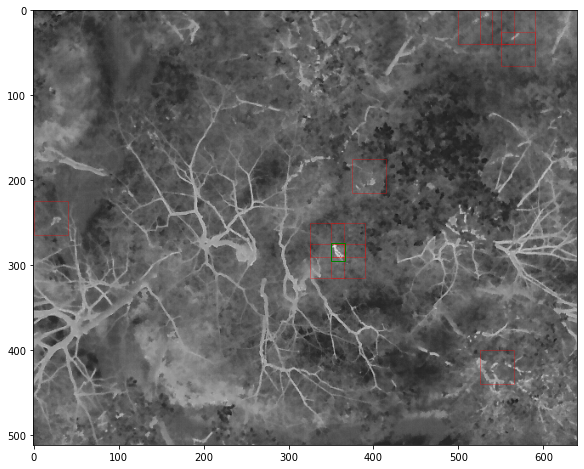

In [ ]:
images = result['images']
results = result['results']
#
img_fn = images[10]['file_name']
img_id = images[10]['id']
bb = filter(lambda i: i['image_id'] == img_id, results)
bbox_animal = filter(lambda x: x['category_id'] == 1, bb)
bbox_animal = list(bbox_animal)
print(len(bbox_animal))

annotations = result['annotations']
ann = filter(lambda i: i['image_id'] == img_id, annotations)
ann = list(ann)
print(len(ann))

p = os.path.join(target_dir,img_fn)
img = Image.open(p)
img = np.asarray(img)
#


rects = []
for i in bbox_animal:
    x,y,w,h = i['bbox']
    rect = patches.Rectangle((x,y),w,h,linewidth=1, edgecolor='r', facecolor='none', alpha=0.3)
    rects.append(rect)
#
for i in ann:
    x,y,w,h = i['bbox']
    rect = patches.Rectangle((x,y),w,h,linewidth=1, edgecolor='g', facecolor='none')
    rects.append(rect)
#
print(f'number of IOA: {len(rects)}')
#
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.imshow(img)
for rect in rects:
    ax.add_patch(rect)
plt.show()

In [ ]:
images = ret_coco['images']
annotations = ret_coco['annotations']
im = filter(lambda i: i['id'] == 47, images)
im = list(im)

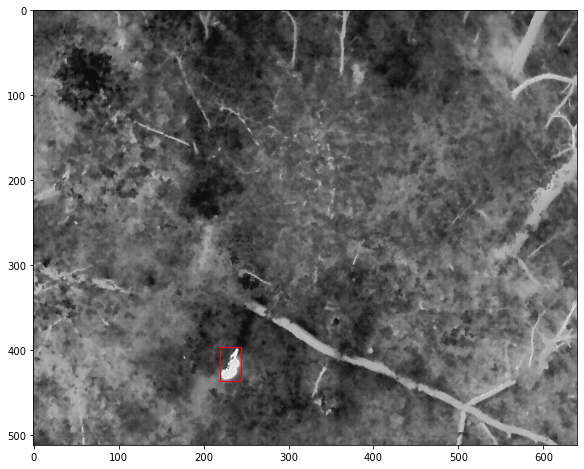

In [ ]:
im = images[20]
fp = target_dir + "\\" + im['file_name']
img = Image.open(fp)
img = np.asarray(img)
image_id = im['id']
rtn = filter(lambda x: x['image_id']==image_id, annotations)
rects = []
for i in rtn:
    x,y,w,h = i['bbox']
    rect = patches.Rectangle((x,y),w,h,linewidth=1, edgecolor='r', facecolor='none')
    rects.append(rect)
_, ax = plt.subplots(1,1, figsize=(10,8))
ax.imshow(img, cmap='gray')
for rect in rects:
    ax.add_patch(rect)
plt.show()